# Mini Project 3 Report

Your name: Mohana Krishna Sanagavarapu

In [13]:
%matplotlib inline
import math 
from matplotlib import pyplot as plt

In [9]:
import pandas as pd
import numpy as np

In [10]:
from csci3202.data_utils import get_CIFAR10_data
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [5]:
%store -r model2
%store -r solver2
%store -r solver1
%store -r conf_matrix
%store -r cpreds
%store -r wpreds

%store -r model1

In [13]:
s1_acc=solver1.check_accuracy(data['X_test'],data['y_test'])

0.61

In [14]:
s2_acc=solver2.check_accuracy(data['X_test'],data['y_test'])

0.667

Get data for confusion matrix for model2

In [66]:
X=data['X_test']
y=data['y_test']
N=X.shape[0]
conf_matrix = np.zeros((10,10))

In [12]:
num_batches = int(N/100)
cpreds=[]
wpreds=[]
wcpreds=[]
if num_batches%100!=0:
    num_batches+=1
for i in range(num_batches):
    start = i*100;
    end = (i+1)*100
    if end>N:
        end=N
    actual=y[start:end]
    scores=model2.loss(X[start:end])
    pred = np.argmax(scores,axis=1)
    for j in range(actual.shape[0]):
        conf_matrix[actual[j]][pred[j]]+=1
        if actual[j]!=pred[j] and len(wpreds)<=10:
            wpreds.append(start+j)
            wcpreds.append(pred[j])
        elif actual[j]==pred[j] and len(cpreds)<=10:
            cpreds.append(start+j)     

/home/m/mini_project3_repo/csci3202/layers.py:169: RuntimeWarning: Mean of empty slice.
  mu = x.mean(axis=0)
/home/m/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/m/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


## Results

- Attempt these problems only after you have finished and tested your implementation.
- If you modify any of the python files, remember to "restart the kernel" or else the changes will not take effect.
- You will need to modify the code below, perhaps adding some nice print statements or adding your results to a table.

We would like to see a the following tables/figures:

1. A few different initial conditions for the weights of your CNN and what the performance of the converged network was on the test set.
2. For the few different architectures listed in the assignment, what were the respective performances on the test set.
3. For your best-performing network, a [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) for each class of "true" versus "predicted" labels.
4. A table of figures of a few correctly-labeled and mistlabeled cases.
5. For your best-performing network, what was the [loss versus epoch/iteration](https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45).

`Put your table with results here!` You may [create a table using markdown](https://www.tablesgenerator.com/markdown_tables) (below) or print a nicely formatted table using a library such as Pandas.

| Col 1  | Col 2   |  Col 3 |
|---  |---  |---  |
|  a1 | a2  |  a3 |
|  b1 | b2  |  b3 |

Accuracies on the test set for model1 and model2

| model  | model1   |  model2 |
|---  |---  |---  |
|  train | 0.734  |  0.71 |
|  validation | 0.621  |  0.682 |
|  test | 0.61 | 0.667 |

Confusion matrix for model2 (best performing model)

In [7]:
column_names = ['0','1','2','3','4','5','6','7','8','9']
row_names = ['0','1','2','3','4','5','6','7','8','9']
df = pd.DataFrame(conf_matrix,columns=column_names,index=row_names)
df

,0,1,2,3,4,5,6,7,8,9
0,65.0,1.0,11.0,1.0,4.0,3.0,3.0,2.0,10.0,3.0
1,2.0,78.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0
2,6.0,2.0,56.0,4.0,9.0,11.0,7.0,2.0,3.0,0.0
3,3.0,1.0,9.0,51.0,7.0,20.0,7.0,2.0,2.0,1.0
4,2.0,1.0,10.0,7.0,51.0,5.0,6.0,6.0,2.0,0.0
5,0.0,1.0,7.0,13.0,7.0,48.0,3.0,6.0,1.0,0.0
6,0.0,1.0,6.0,9.0,4.0,5.0,82.0,3.0,2.0,0.0
7,0.0,0.0,1.0,5.0,11.0,9.0,0.0,73.0,1.0,2.0
8,13.0,4.0,1.0,0.0,0.0,1.0,2.0,1.0,81.0,3.0
9,3.0,9.0,4.0,3.0,2.0,1.0,0.0,0.0,5.0,82.0


In [31]:
from csci3202.data_utils import load_CIFAR10
cifar10_dir = 'csci3202/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

Examples of correctly classified samples

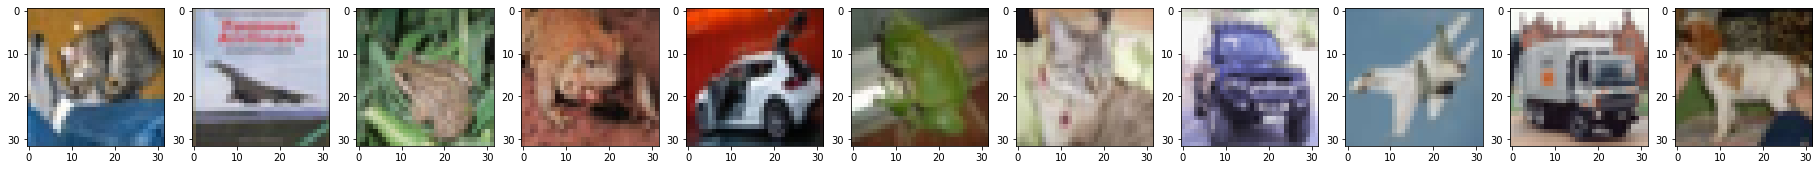

In [61]:
fig=plt.figure(figsize=(32,32))
for i in range(len(cpreds)):
    ax=fig.add_subplot(1,len(cpreds),i+1)
    ax.imshow(X_test[cpreds[i]].astype(np.int),interpolation='nearest')

Examples of incorrectly classified samples

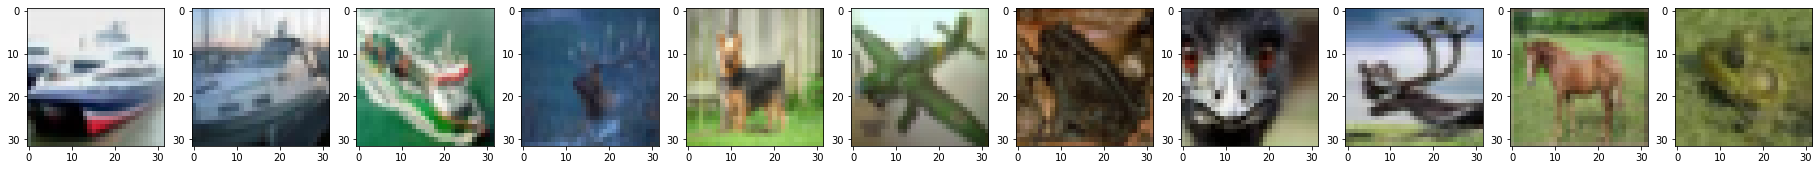

In [62]:
fig=plt.figure(figsize=(32,32))
for i in range(len(wpreds)):
    ax=fig.add_subplot(1,len(wpreds),i+1)
    ax.imshow(X_test[wpreds[i]].astype(np.int),interpolation='nearest')

A plot of loss versus iteration

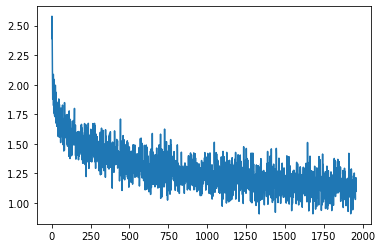

In [65]:
plt.plot(solver2.loss_history)

Write a brief analysis of your results. Some questions to answer:
- Which architecture conducted inference the fastest? Why do you think this is the case?
- Which architecture took the longest to train?
- How similar were the classification accuracies across the various architectures you tested?
- What modifications could you make to improve your results?
- Was there anything else interesting in your results?

In [79]:
from time import time
start=11
end=20
t0=time()
scores=model2.loss(X[start:end])
pred = np.argmax(scores,axis=1)   
t1=time()
print("Model2 inference time:",t1-t0)
t2=time()
scores1=model1.loss(X[start:end])
pred1 = np.argmax(scores1,axis=1)   
t3=time()
print("Model1 inference time:",t3-t2)

Model2 inference time: 3.695420265197754
Model1 inference time: 2.7565653324127197


As can be seen model1 is fast at inference, reason can be attributed to the depth of the network, because model2 is deeper than model1.

model2 took more time to train, because it is deeper than model1.

Hyperparameter can be/should be finetuned to improve accuracy. A number of different architectures can be tried like varying the number of neurons in hidden layer, increasing the depth of network, adding dilated convolution layers to increase the receptive field and see how they affect the accuracy. Also the model can be trained fro a higher number of epochs to learn better and increase the accuracy.

## Describe Your Implementation and Reflect

Some questions to answer in your write-up:
- What was your strategy to solve this problem?
- How did you come to your solutions for the forward and backward layers?
- What other files or methods did you change?
- What was the most difficult part of the project?
- What was something surprising you found?

Please provide some elaboration with your answers. When describing your implementation, remember that we have not watched you solve this problem so you will need to give more details than you think is necessary.

I was already familiar with the mathematics involved in training a CNN, so I started with revising that math, thinking in terms of python i.e matrices which could speed up the computation and then following the TODOs to complete implementing the functions. I will try to explain my implementation of the layers,
1) Affine forward layer: This is a fully connected layer, where the input is flatenned to a 1D vector multiplied by the weight vector and summed with the bias. This is rpresented mathematically as $output = w^T * input + b$ <br>
2) Affine backward layer: For the backpropogation, we need to find the derivative of the error with respect to weight matrix and the input matrix at each affine forward layer. The derivative with respect to weight matrix can be obtained using the chain rule. Using chain rule it is easy to see that the $dw = d(output)*(input)^T$ and $d(input) = d(output)*w^T$<br>
3) Conv forward layer: Here instead of a number of neurons in the layer, we consider filter's or kernels of fixed size which move over the image and try to detect different features in the image. This is done because in a image the data is spatially dependent and by flatenning the image as in a fully connected layer we loose that spatial information. A real value is generated by multiplying the corresponding values of the filter and the image patch where the filter is present and then adding the resulting values, this is repeated till the filter traverses the whole image. So every patch of image obtained by using proper padding and stride, and for every filter we can get the $output = sum(input*w)+b$ The output would have the the channels equal to the number of filters used.<br>
4) Conv backward layer: The backpropogation equations for conv layer are similar to that of affine layer except that there is parameter sharing i.e weights are shared among neurons. This parameter sharing results in a convolution operation, so d(input) can be expressed as a convolution between the d(output) and weight matrix. Similarly dw can be expressed as a convolution between d(output) and the input matrix.<br>
After implementing the functions I trained the model, but training takes a lot of time and if there are any interruptions then I need to start training from the beginning, so I decided to setup a personal VM using google cloud instance, installed required libraries and setup remote desktop to that machine. Then I started training the models on that VM, which allowed me to use the time for other tasks.<br>
I made a mistake of not seeing the questions in this report till my last week, which I alloted for report writing. I realised that this report required the trained models, in order to compare them. So I retrained 2 important models and then completed the report in the limited time avalable. I tried other architectures too as can be seen in the jupyter notebook but I cannot test those models on the test set as the variables were overridden.<br>
From my experiments and results, I found that changing the number of filters did not effect the accuracies much, which I felt was surprising and I could not justify that behaviour.

## Going Above and Beyond
If you implement any additional features for extra credit, clearly describe them here with pointers to any code in your notebook or other files if applicable.

`Your answer here.`

Describe the analysis you did and provide your results in the form of a figure or a table.

`Your answer here.`

Reflect on your work for this section. What was interesting, or what did you learn? A short paragraph here is fine.

`Your answer here.`